<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/classification/List6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from google.colab import files
# files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/secrets/kaggle.json' ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [160]:
!kaggle datasets download -d prathamtripathi/drug-classification

!mkdir dataset

!unzip -o -q /content/drug-classification.zip -d /content/dataset

drug-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists


In [225]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_blobs

In [226]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [227]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)

In [228]:
drug = pd.read_csv("/content/dataset/drug200.csv", sep=",", header=0)

drug.rename(columns={
    'Age': 'age', 
    'Sex': 'sex', 
    'BP': 'pb', 
    'Cholesterol': 
    'cholesterol',
    'Na_to_K':'na_to_k_ratio', 
    'Drug': 'target'},
    inplace=True
    )

drug_target = drug.target

drug.drop(['target'], axis=1, inplace=True)


In [229]:
target_label_encoder = LabelEncoder()

target_label_encoder.fit(drug_target)

drug_target_labels = target_label_encoder.classes_

print(drug_target_labels)

drug_target = target_label_encoder.transform(drug_target)


# print(drug.shape)
# temp = drug_target.reshape(-1, 1)
# sns.pairplot(drug, hue=temp.any())

['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [230]:
label_encoder = LabelEncoder()

drug['sex'] = label_encoder.fit_transform(drug['sex'])
drug['pb'] = label_encoder.fit_transform(drug['pb'])
drug['cholesterol'] = label_encoder.fit_transform(drug['cholesterol'])


In [231]:
lda_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('lda_dim_reduction', LDA(n_components=2)),
    ]
)

# Zad 1

## Iris

In [232]:
iris_lda = pd.DataFrame(data=lda_pipeline.fit_transform(iris.data, iris.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

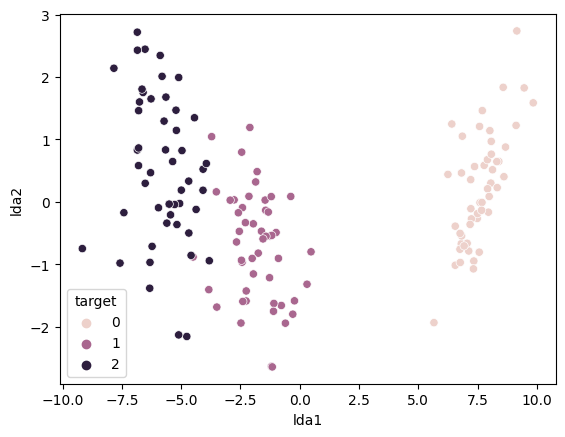

In [233]:
sns.scatterplot(data=iris_lda, x='lda1', y='lda2', hue=iris.target)

In [234]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_lda, iris.target, test_size=0.33)

In [235]:
# param_grid = {'n_neighbors': np.arange(3, 6)}

# knn_cv = GridSearchCV(knn, param_grid, cv=5)

# knn_cv.fit(X_train, Y_train)

In [236]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [237]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [238]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

## Wine


In [239]:
wine_lda = pd.DataFrame(data=lda_pipeline.fit_transform(wine.data, wine.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

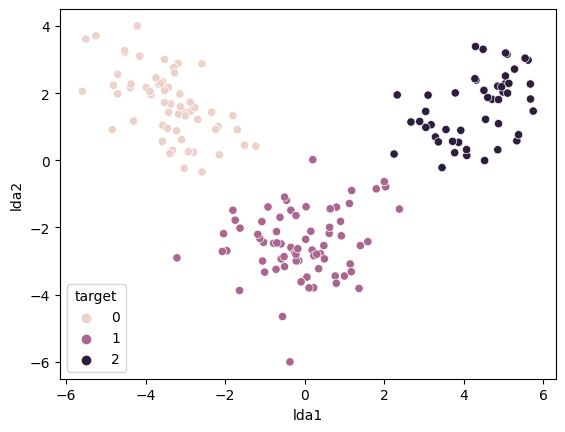

In [240]:
sns.scatterplot(data=wine_lda, x='lda1', y='lda2', hue=wine.target)

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_lda, wine.target, test_size=0.33)

In [242]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [243]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [244]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

## Drug

<Axes: >

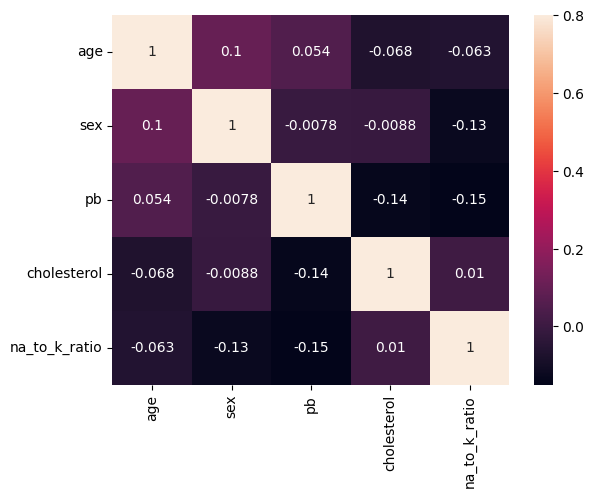

In [245]:
sns.heatmap(drug.corr(),vmax=0.8, annot= True)

In [246]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

# Zad 2

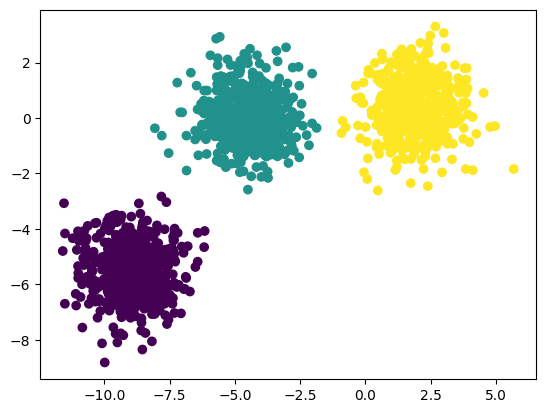

In [247]:
n_samples = 1500
random_state = 170


X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

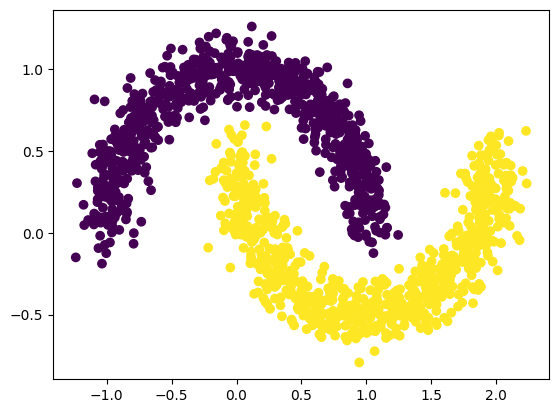

In [249]:
n_samples = 1500

X_m, y_m = make_moons(n_samples=n_samples, noise=0.1)

plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m)
plt.show()